<a href="https://colab.research.google.com/github/famigerate/data-analyst-panda-demo/blob/main/Panda_ETL_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# get data from github
file_path = 'https://raw.githubusercontent.com/famigerate/data-analyst-panda-demo/main/State-FHB-OO.xlsx'
excel_df = pd.DataFrame(pd.read_excel(file_path,sheet_name='Data1'))
excel_df

In [ ]:
# excel to csv
csv_file = 'State-FHB-OO.csv'
excel_df.to_csv(csv_file,index=None, header=True)
# read the csv
df = pd.read_csv(csv_file)
df

In [ ]:
# Filter the first column and Value of NSW column
columns_to_keep = (df.columns[0] == df.columns) | df.columns.str.contains("New South Wales", case=False) & df.columns.str.contains("Value", case=False)
df_filtered_column = df.loc[:, columns_to_keep]
df_filtered_column

In [ ]:
# filter the unnecessary rows but for human
df_filtered_row = df_filtered_column.iloc[~df_filtered_column.index.isin(range(2, 9))]
df_filtered_row.reset_index(drop=True, inplace=True)
df_filtered_row

In [ ]:
# filter unecesarry row but for charting
df_filtered_chart = df_filtered_column.iloc[~df_filtered_column.index.isin(range(0, 9))]
df_filtered_chart.reset_index(drop=True, inplace=True)
df_filtered_chart
# df_filtered_chart.dtypes

In [ ]:
# clean the data type
df_filtered_chart.iloc[:, 0] = pd.to_datetime(df_filtered_chart.iloc[:, 0])
for col_index in range(1, df_filtered_chart.shape[1]):
    df_filtered_chart.iloc[:, col_index] = pd.to_numeric(df_filtered_chart.iloc[:, col_index])
df_filtered_chart
#df_filtered_chart.dtypes

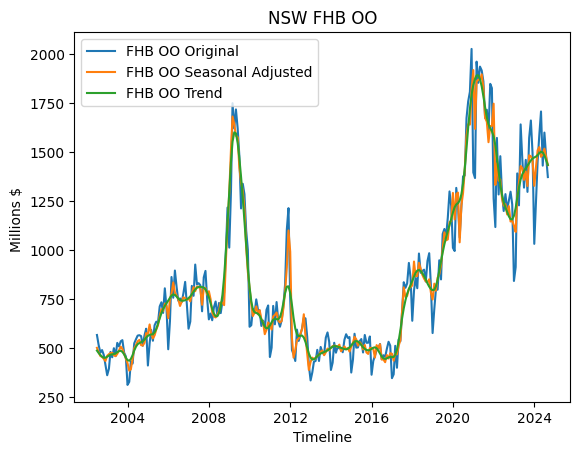

In [86]:
# Create the chart
# First column for x-axis
x = df_filtered_chart.iloc[:, 0]

# Subsequent column for y-axis
plt.plot(x, df_filtered_chart.iloc[:, 1], label="FHB OO Original")
plt.plot(x, df_filtered_chart.iloc[:, 2], label="FHB OO Seasonal Adjusted")
plt.plot(x, df_filtered_chart.iloc[:, 3], label="FHB OO Trend")

# Add labels, title, and legend
plt.xlabel("Timeline")
plt.ylabel("Millions $ ")
plt.title("NSW FHB OO")
plt.legend()
plt.show()